# Predictive Modeling Example01: Data Generation

In this notebook we create a synthetic dataset that we will later attempt to identify the relationship between the features and the target.  We will use this dataset to demonstrate the use of the `sklearn` library to perform predictive modeling using linear requression.

There are 6 steps to this process:
1. Import libraries and modules
   * don't forget to set the random.seed for reproducibility
2. Define the hidden relationship
3. Create input and output values
4. Add noise to 'hide' the true relationship
5. Save the data to a csv file.

## Step 1: Import a number of libraries that we expect to use

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# see importing_packages.demo.ipynb for more details

np.random.seed(1) # set this to ensure the results are repeatable. 

## Step 2:  Define a hidden linear relationship/model

First let's define our relationship (normally, this is hidden, but since we are creating the data, we will need to identify this)

In [62]:
# our hidden relationship is a single input variable linear regression model
# this will be in the form of y = b0 + b1*x1
b1 = 30.5 # slope for x
b0 = 20   # y intercept

## Step 3: Create input and output data using the model

Let's set the number of observations that we will synthesize...

In [63]:
sample_size = 1000

We need to create a set of X (input) values. These values are independent, so we could choose any set of X values we like. We could simply create a simple linear sequence, or we could create draw random values from a distribution (uniform, or gaussian (aka normal). Though it doesn't affect our outcome (we are going to use a linear model), we will draw from a normal distribution (we often find data is normally distributed).

Though there are many ways we could accomplish this, the numpy library is a good choice.  We will use the `numpy.random.normal()` function to draw random values from a normal distribution.  We will need to specify the mean and standard deviation of the distribution.  We will use a mean of 0 and a standard deviation of 1.  We will also need to specify the number of values to draw.  We will use the `size` parameter to specify the number of values to draw.

NOTE: We could also choose to use the `numpy.random.uniform()` function to draw random values from a uniform distribution.  We would need to specify the minimum and maximum values to draw from.  We would also need to specify the number of values to draw. Also, we could use the `numpy.arange()` function to create a sequence of values.  We would need to specify the start, stop, and step values.  We would also need to specify the number of values to draw. Finally, we could also use the `numpy.linspace()` function to create a sequence of values.  We would need to specify the start, stop, and number of values to draw.

In [64]:
# create a simple sequence of X values
#x1 = np.linspace(0, 100, sample_size) # https://numpy.org/doc/stable/reference/generated/numpy.linspace.html#numpy.linspace

# draw random samples from the uniform distribution
#x1 = np.random.uniform(low=0.0, high=100.0, size=sample_size) # uniform distribution # https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html#numpy.random.uniform

# draw samples from the normal distribution
x1 =  np.random.normal(loc=0.0, scale=10.0, size=sample_size) # https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html#numpy.random.normal

Once we have the X values (input), we can generate y values using our 'hidden' model...

In [65]:
y = b0 + b1 * x1

Now, let's plot this data using a scatter plot.

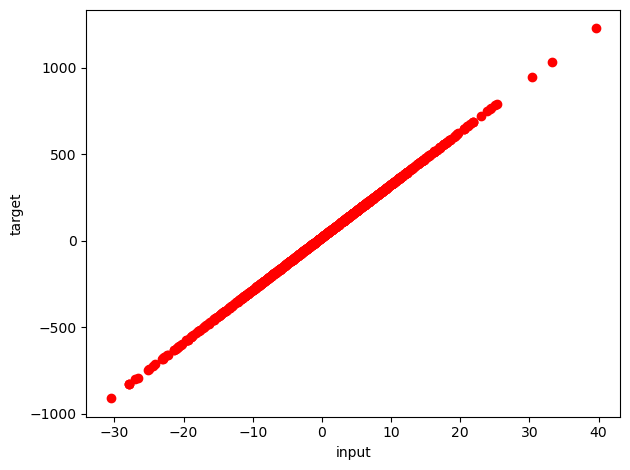

In [66]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(x1, y, color='red')

ax.set_xlabel('input')
ax.set_ylabel('target')
plt.tight_layout()
plt.show()

# see matplotlib_scatter.ipynb for more examples of matplotlib scatter plots

But, this is rather boring data to analyze, because the 'hidden' model is not really hidden at all... lt's fix that by adding some noise to the data.

## Step 4: Add some random noise to 'hide' the model

Now, let's obscure the model by adding noise to the data by adding errors that are randomly selected from a norma distribution

In [67]:
e_mean = 0
e_stdev = 200
e = np.round(np.random.normal(e_mean, e_stdev, sample_size), 2) # round to two decimal places
y = y + e

Question to ask yourself: 
    1. What is the effect of the standard deviation of the noise on the data? 
    2. What happens if you increase or decrease the standard deviation? 
    3. What happens if you change the mean of the noise? (we will discuss this in the associated video for this notebooke)

Now, let's look at a scatter plot of both the X and y data with the noise added in...

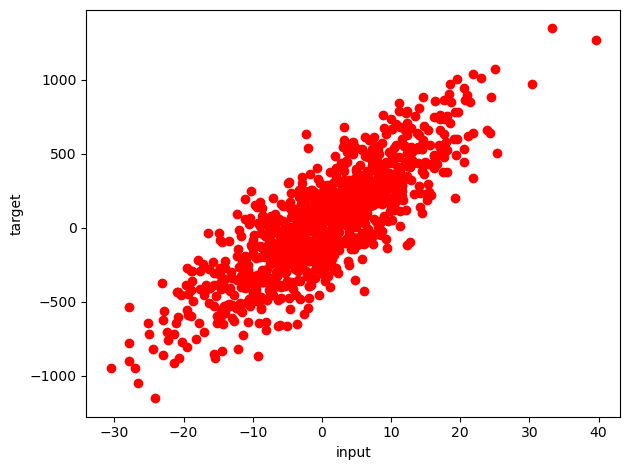

In [68]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(x1, y, color='red')

ax.set_xlabel('input')
ax.set_ylabel('target')
plt.tight_layout()
plt.show()

Question: What would happen if we added noise to the x1 variable?  What would the scatter plot look like?

## Step 5: Save our synthesized data to a file (we will save it as a csv file)

Since our goal is to generate data that we can analyze with another notebook (for practice), let's save this data to a csv.  We will use the `pandas` library to do this.

First we will create a dataframe with the data we just similated...

In [69]:
df = pd.DataFrame({'input': x1, 'target': y})
df.head(3)

,input,target
0,16.243454,484.775336
1,-6.117564,-653.085706
2,-5.281718,-39.492384


Now, let's save the data we created to a csv file. 

In [70]:
#df.to_csv('../data/model1_dataset.csv', index=False) # NOTE: this is relative to the notebook location. Be sure to change this path to something that makes sense for your project.

df.to_csv('model1a_dataset.csv', index=False) # NOTE: this is relative to the notebook location. Be sure to change this path to something that makes sense for your project.


## Conclusion

We have just created a synthetic dataset that we can practice our predictive modeling on. We will use this dataset in the next notebook